<a href="https://colab.research.google.com/github/Shafiu1/BanglaBlog/blob/main/thesis_01(main).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow torch==2.3.0 torchvision==0.18.0 transformers pillow numpy pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
folder_path = '/content/drive/MyDrive/BanglaNewsClassifier/'
print(os.listdir(folder_path))

['headlines.gsheet', 'Images', 'headlines.csv', 'train_images.pkl', 'val_images.pkl', 'test_images.pkl', 'best_model.h5', 'best_model_tuned.h5', 'bangla_news_model.pth', 'best_model.pth']


In [4]:
from google.colab import drive
import os

# Mount Google Drive
# drive.mount('/content/drive')

# Define paths
folder_path = '/content/drive/MyDrive/BanglaNewsClassifier/'
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify folder contents
print("Contents of BanglaNewsClassifier:", os.listdir(folder_path))

# Check if CSV exists
if os.path.exists(csv_path):
    print("headlines.csv found!")
else:
    print("headlines.csv NOT found!")

# Check if image folder exists and list some images
if os.path.exists(image_folder):
    print("Images folder found! First 5 images:", os.listdir(image_folder)[:5])
else:
    print("Images folder NOT found!")

Contents of BanglaNewsClassifier: ['headlines.gsheet', 'Images', 'headlines.csv', 'train_images.pkl', 'val_images.pkl', 'test_images.pkl', 'best_model.h5', 'best_model_tuned.h5', 'bangla_news_model.pth', 'best_model.pth']
headlines.csv found!
Images folder found! First 5 images: ['3006.jpg', '3009.jpg', '3011.jpg', '3010.jpg', '3008.jpg']


In [5]:
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()  # Sort for consistency
total_images = len(jpg_files)

print(f"Total number of .jpg images: {total_images}")
if total_images == 4007:
    print("Confirmed: 4,007 images found!")
else:
    print(f"Warning: Expected 4,007 images, but found {total_images}!")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

Total number of .jpg images: 4007
Confirmed: 4,007 images found!
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']


In [6]:
from google.colab import drive
import os
from collections import Counter

# Mount Google Drive
# drive.mount('/content/drive')

# Define image folder path
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# List .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total number of .jpg images: {len(jpg_files)}")

# Check for duplicate base names (ignoring suffixes like _copy or (1))
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}

if duplicates:
    print(f"Found {len(duplicates)} base names with duplicates:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times")
        # List files with this base name
        matching_files = [f for f in jpg_files if f.startswith(name)]
        print(f"Files: {matching_files}")
else:
    print("No duplicate base names found!")

# Check for files beyond 4007.jpg
extra_files = [f for f in jpg_files if f[:-4].isdigit() and int(f[:-4]) > 4007]
print(f"Files beyond 4007.jpg: {len(extra_files)}")
if extra_files:
    print("Extra files:", extra_files[:5])

Total number of .jpg images: 4007
No duplicate base names found!
Files beyond 4007.jpg: 0


In [7]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

# Mount Google Drive
# drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify paths
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Images folder not found at {image_folder}")

# Count .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total .jpg images: {len(jpg_files)}")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

# Check for duplicates
from collections import Counter
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}
if duplicates:
    print(f"Found {len(duplicates)} duplicate base names:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times: {[f for f in jpg_files if f.startswith(name)]}")
else:
    print("No duplicate base names found!")

# Load CSV
df = pd.read_csv(csv_path)
print(f"Total rows in CSV: {len(df)}")
print("CSV head:", df.head())

# Map image paths
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}.jpg")

# Check missing files
missing_files = [path for path in df['full_image_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")
if missing_files:
    print("Missing files (first 5):", missing_files[:5])

# Check unreadable files
def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except Exception as e:
        print(f"Error with {image_path}: {e}")
        return False

unreadable_files = [path for path in df['full_image_path'] if os.path.exists(path) and not test_image(path)]
print(f"Unreadable files: {len(unreadable_files)}")
if unreadable_files:
    print("Unreadable files (first 5):", unreadable_files[:5])

# Filter valid samples
df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
# df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples after filtering: {len(df)}")

Total .jpg images: 4007
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']
No duplicate base names found!
Total rows in CSV: 4007
CSV head:                                      Heading(Bangla) Image_Path  \
0  সরকারে থেকে যদি দল গঠন করেন, এ দেশের মানুষ মেন...   0001.jpg   
1  টাকা না পাওয়ায় দেশে ফিরতে পারছেন না রাজশাহীর ব...   0002.jpg   
2  তারকা ফুটবলারদের সৌদি যাওয়া ঠেকাতে বার্সেলোনার...   0003.jpg   
3  নারী ফুটবলারদের পাশে দাঁড়ান; তাঁরা শুধু নিজেরা...   0004.jpg   
4                     অনেক বিরহ হলো, এবার অ্যাকশন...   0005.jpg   

  Category(Bangla)             English             Bangla  
0          রাজনীতি            Politics            রাজনীতি  
1         খেলাধুলা              Sports           খেলাধুলা  
2         খেলাধুলা  Economy & Business  অর্থনীতি ও ব্যবসা  
3         খেলাধুলা       Entertainment             বিনোদন  
4           বিনোদন          Technology          প্রযুক্

In [8]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify paths
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Images folder not found at {image_folder}")

# Count .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total .jpg images: {len(jpg_files)}")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

# Check for duplicates
from collections import Counter
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}
if duplicates:
    print(f"Found {len(duplicates)} duplicate base names:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times: {[f for f in jpg_files if f.startswith(name)]}")
else:
    print("No duplicate base names found!")

# Load CSV
df = pd.read_csv(csv_path)
print(f"Total rows in CSV: {len(df)}")
print("CSV head:", df.head())
print("CSV columns:", df.columns.tolist())

# Map image paths
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

# Check missing files
missing_files = [path for path in df['full_image_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")
if missing_files:
    print("Missing files (first 5):", missing_files[:5])

# Check unreadable files
def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except Exception as e:
        print(f"Error with {image_path}: {e}")
        return False

unreadable_files = [path for path in df['full_image_path'] if os.path.exists(path) and not test_image(path)]
print(f"Unreadable files: {len(unreadable_files)}")
if unreadable_files:
    print("Unreadable files (first 5):", unreadable_files[:5])

# Filter valid samples
df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples after filtering: {len(df)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total .jpg images: 4007
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']
No duplicate base names found!
Total rows in CSV: 4007
CSV head:                                      Heading(Bangla) Image_Path  \
0  সরকারে থেকে যদি দল গঠন করেন, এ দেশের মানুষ মেন...   0001.jpg   
1  টাকা না পাওয়ায় দেশে ফিরতে পারছেন না রাজশাহীর ব...   0002.jpg   
2  তারকা ফুটবলারদের সৌদি যাওয়া ঠেকাতে বার্সেলোনার...   0003.jpg   
3  নারী ফুটবলারদের পাশে দাঁড়ান; তাঁরা শুধু নিজেরা...   0004.jpg   
4                     অনেক বিরহ হলো, এবার অ্যাকশন...   0005.jpg   

  Category(Bangla)             English             Bangla  
0          রাজনীতি            Politics            রাজনীতি  
1         খেলাধুলা              Sports           খেলাধুলা  
2         খেলাধুলা  Economy & Business  অর্থনী

In [9]:
from google.colab import drive
import os
import pandas as pd
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Verify paths
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}")
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"Images folder not found at {image_folder}")

# Count .jpg files
jpg_files = [f for f in os.listdir(image_folder) if f.lower().endswith('.jpg')]
jpg_files.sort()
print(f"Total .jpg images: {len(jpg_files)}")
print("First 5 images:", jpg_files[:5])
print("Last 5 images:", jpg_files[-5:])

# Check for duplicates
from collections import Counter
base_names = [f.split('.')[0].split('_')[0].split(' (')[0] for f in jpg_files]
name_counts = Counter(base_names)
duplicates = {name: count for name, count in name_counts.items() if count > 1}
if duplicates:
    print(f"Found {len(duplicates)} duplicate base names:")
    for name, count in duplicates.items():
        print(f"Base name {name} appears {count} times: {[f for f in jpg_files if f.startswith(name)]}")
else:
    print("No duplicate base names found!")

# Load CSV
df = pd.read_csv(csv_path)
print(f"Total rows in CSV: {len(df)}")
print("CSV head:", df.head())
print("CSV columns:", df.columns.tolist())

# Map image paths
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

# Check missing files
missing_files = [path for path in df['full_image_path'] if not os.path.exists(path)]
print(f"Missing files: {len(missing_files)}")
if missing_files:
    print("Missing files (first 5):", missing_files[:5])

# Check unreadable files
def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except Exception as e:
        print(f"Error with {image_path}: {e}")
        return False

unreadable_files = [path for path in df['full_image_path'] if os.path.exists(path) and not test_image(path)]
print(f"Unreadable files: {len(unreadable_files)}")
if unreadable_files:
    print("Unreadable files (first 5):", unreadable_files[:5])

# Filter valid samples
df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples after filtering: {len(df)}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total .jpg images: 4007
First 5 images: ['0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']
Last 5 images: ['4003.jpg', '4004.jpg', '4005.jpg', '4006.jpg', '4007.jpg']
No duplicate base names found!
Total rows in CSV: 4007
CSV head:                                      Heading(Bangla) Image_Path  \
0  সরকারে থেকে যদি দল গঠন করেন, এ দেশের মানুষ মেন...   0001.jpg   
1  টাকা না পাওয়ায় দেশে ফিরতে পারছেন না রাজশাহীর ব...   0002.jpg   
2  তারকা ফুটবলারদের সৌদি যাওয়া ঠেকাতে বার্সেলোনার...   0003.jpg   
3  নারী ফুটবলারদের পাশে দাঁড়ান; তাঁরা শুধু নিজেরা...   0004.jpg   
4                     অনেক বিরহ হলো, এবার অ্যাকশন...   0005.jpg   

  Category(Bangla)             English             Bangla  
0          রাজনীতি            Politics            রাজনীতি  
1         খেলাধুলা              Sports           খেলাধুলা  
2         খেলাধুলা  Economy & Business  অর্থনী

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Valid samples: 4007
Epoch 1:
Train Loss: 0.8442, Val Loss: 0.3792
Train Acc: 0.9522, Val Acc: 0.8769
Epoch 2:
Train Loss: 0.2186, Val Loss: 0.3019
Train Acc: 0.9854, Val Acc: 0.9085
Epoch 3:
Train Loss: 0.0937, Val Loss: 0.4003
Train Acc: 0.9950, Val Acc: 0.8802
Epoch 4:
Train Loss: 0.0424, Val Loss: 0.4014
Train Acc: 0.9964, Val Acc: 0.8918


Epoch 5:
Train Loss: 0.0302, Val Loss: 0.4096
Train Acc: 0.9975, Val Acc: 0.8968


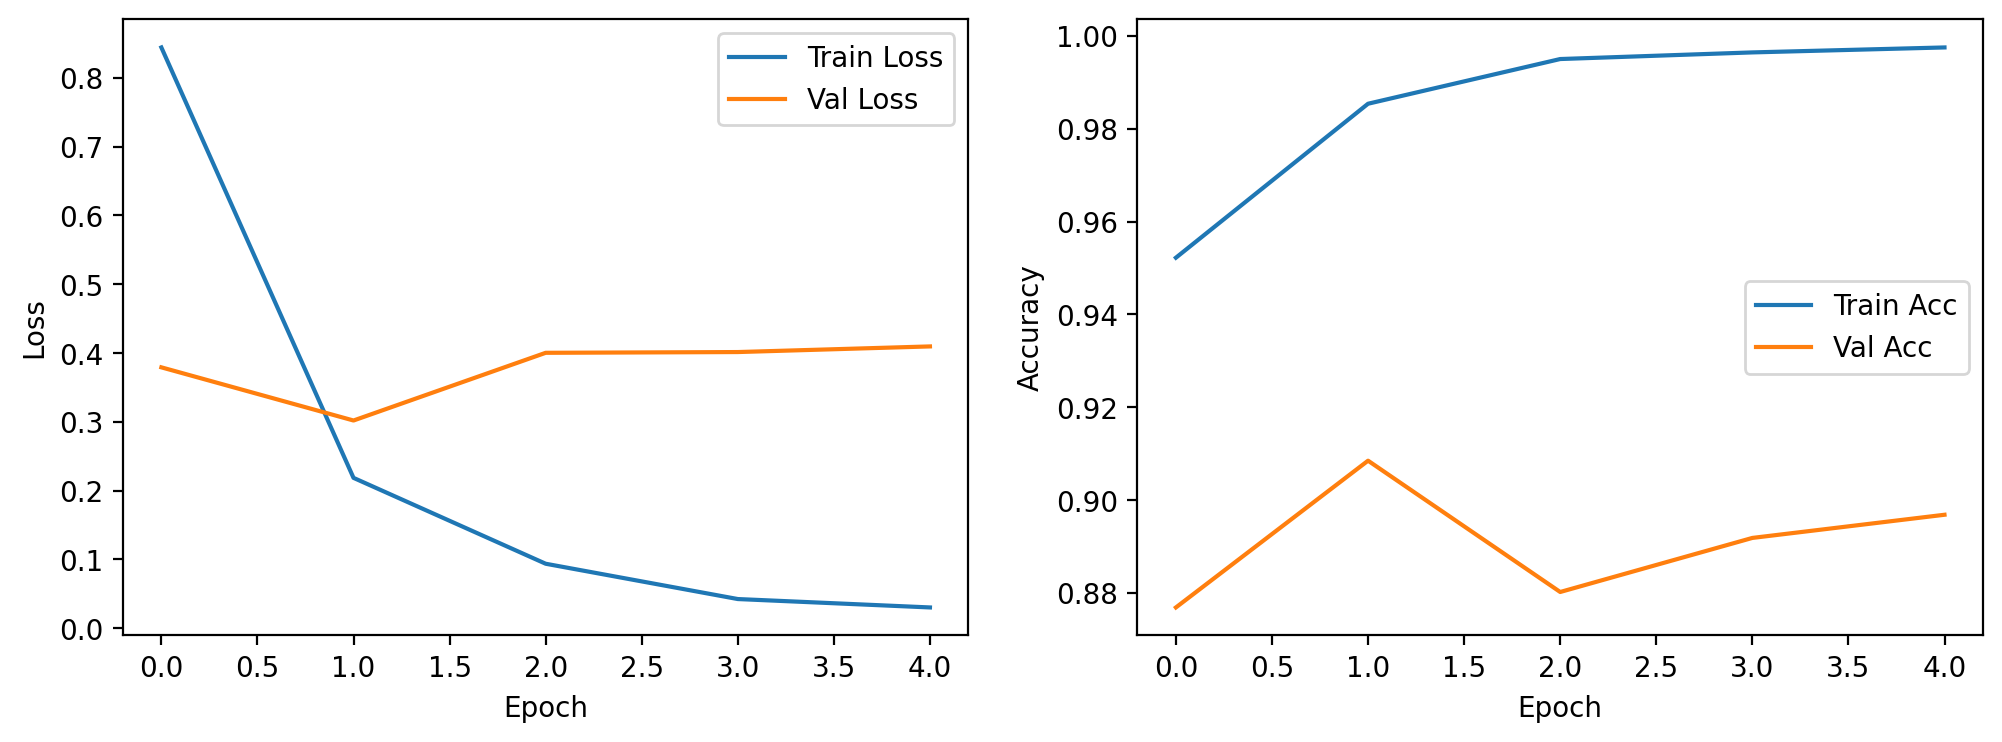

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2437 (\N{BENGALI LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2469 (\N{BENGALI LETTER THA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-pa

Test Accuracy: 0.9336
                      precision    recall  f1-score   support

  অর্থনীতি ও বাণিজ্য       0.99      0.84      0.91       108
            খেলাধুলা       0.95      0.98      0.96       106
           প্রযুক্তি       0.93      0.97      0.95       103
              বিনোদন       0.95      0.93      0.94       100
             রাজনীতি       0.89      0.97      0.93        95
স্বাস্থ্য ও জীবনযাপন       0.90      0.91      0.91        90

            accuracy                           0.93       602
           macro avg       0.93      0.93      0.93       602
        weighted avg       0.94      0.93      0.93       602



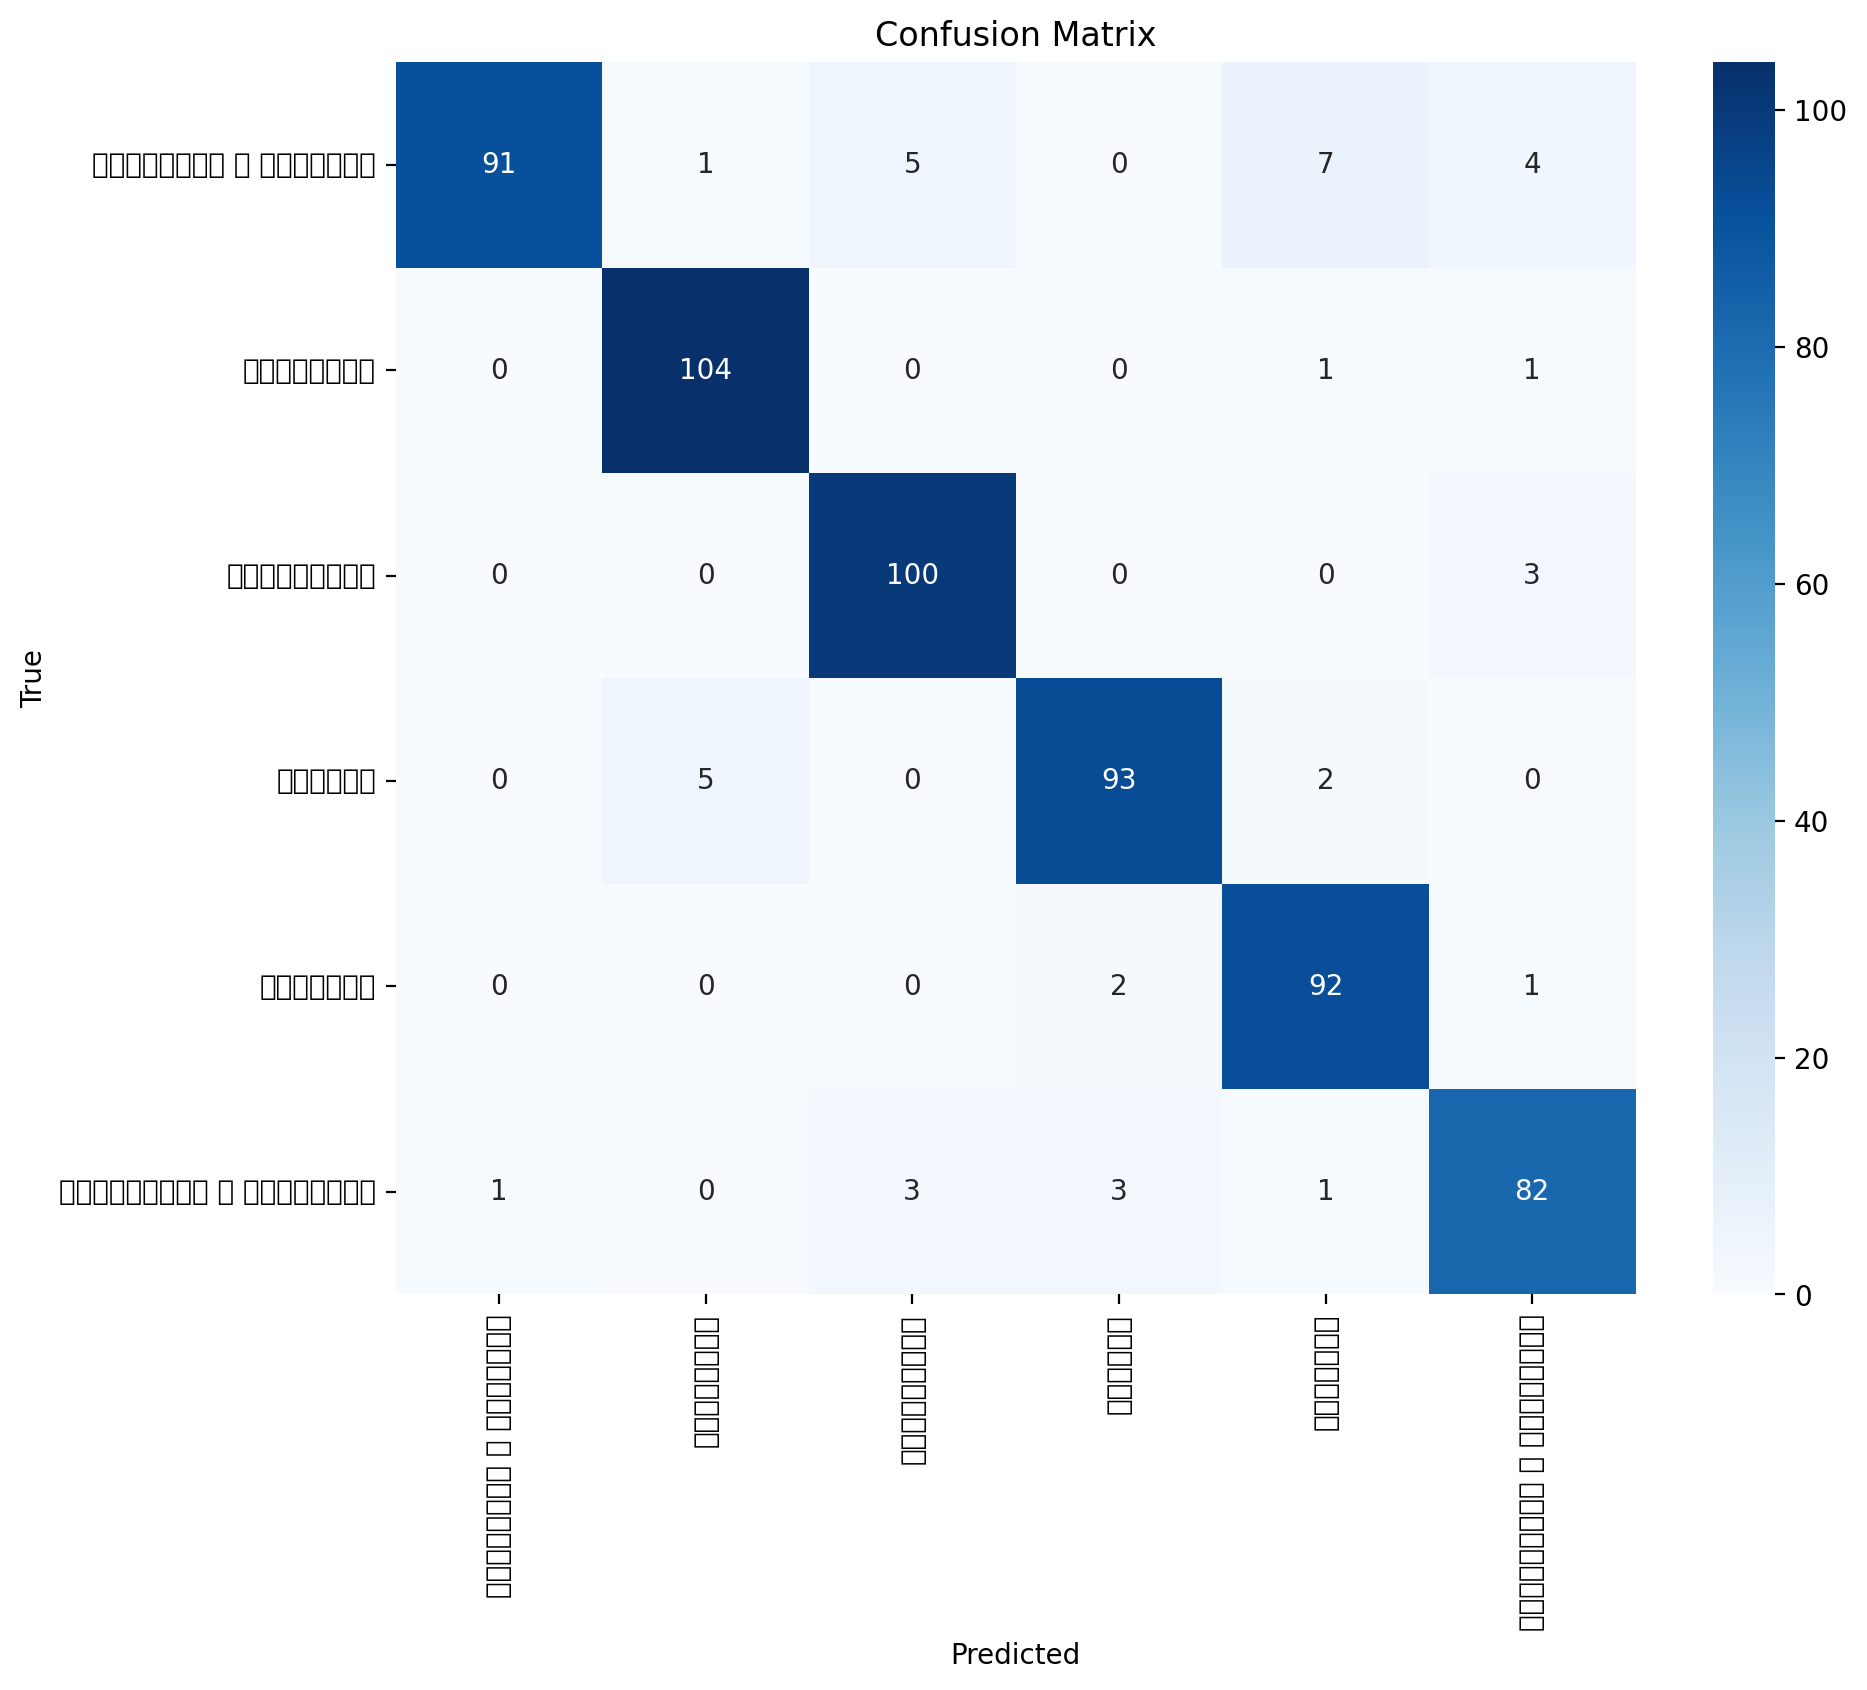

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2460 (\N{BENGALI LETTER JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dis

Model saved!


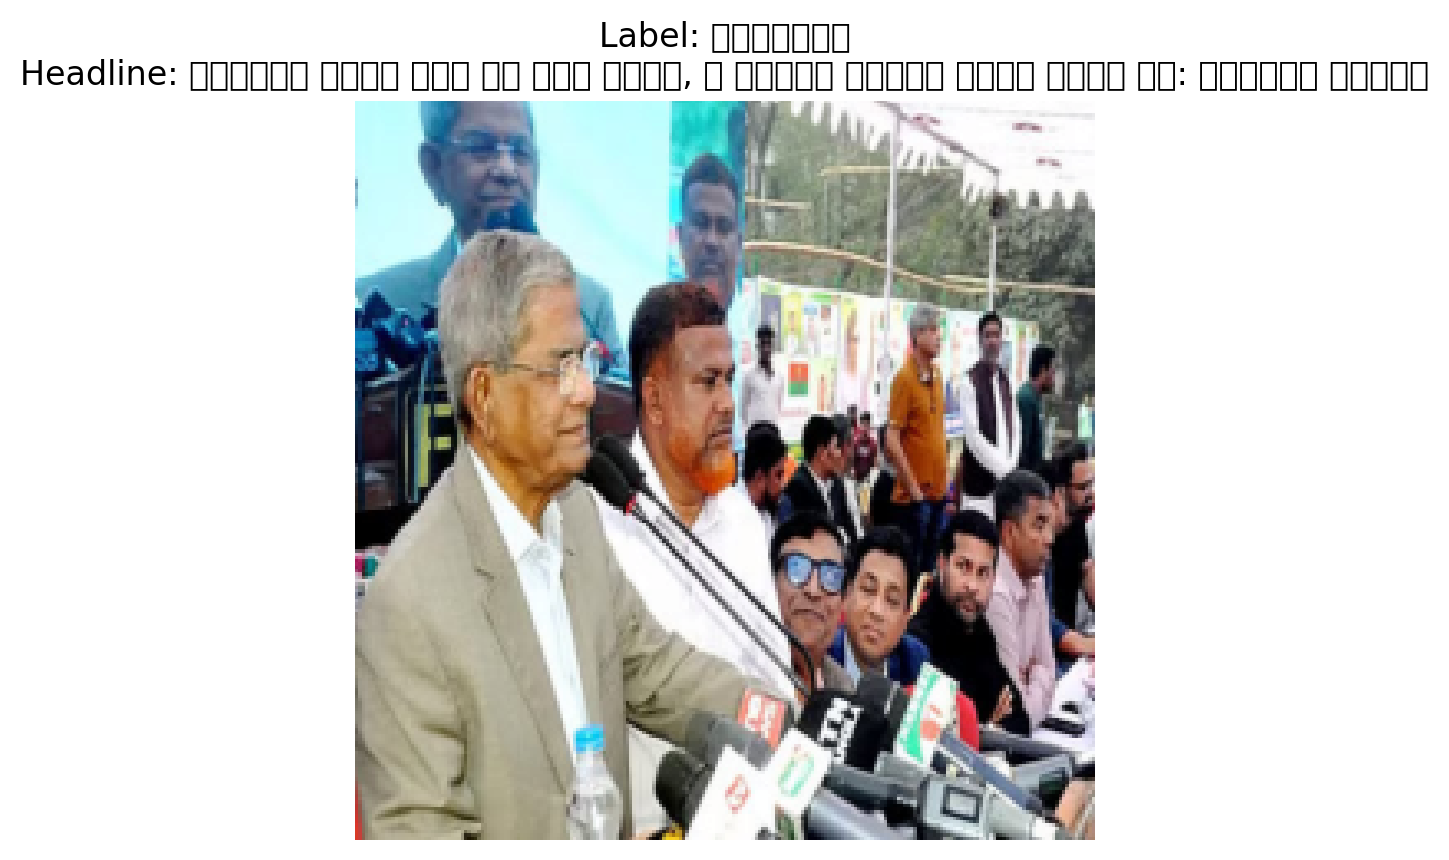

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import torchvision.transforms as transforms
import torchvision.models as models
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# Paths
csv_path = '/content/drive/MyDrive/BanglaNewsClassifier/headlines.csv'
image_folder = '/content/drive/MyDrive/BanglaNewsClassifier/Images/'

# Load and filter CSV
df = pd.read_csv(csv_path)
df['full_image_path'] = df['Image_Path'].apply(lambda x: f"{image_folder}{x}")

def test_image(image_path):
    try:
        img = Image.open(image_path).convert('RGB')
        img.verify()
        return True
    except:
        return False

df = df[df['full_image_path'].apply(lambda x: os.path.exists(x) and test_image(x))]
df = df.drop_duplicates(subset=['Image_Path'])
print(f"Valid samples: {len(df)}")

# Preprocess data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Text preprocessing
tokenizer = AutoTokenizer.from_pretrained('sagorsarker/bangla-bert-base')
tokenized_headlines = tokenizer(df['Heading(Bangla)'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Labels
le = LabelEncoder()
labels = le.fit_transform(df['Category(Bangla)'])
labels = torch.tensor(labels, dtype=torch.long)

# Dataset
class BanglaNewsDataset(Dataset):
    def __init__(self, tokenized_headlines, image_paths, labels, transform):
        self.input_ids = tokenized_headlines['input_ids']
        self.attention_mask = tokenized_headlines['attention_mask']
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        img = self.transform(img)
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'images': img,
            'labels': self.labels[idx]
        }

# Split dataset into 70% train, 15% validation, 15% test
dataset = BanglaNewsDataset(tokenized_headlines, df['full_image_path'].tolist(), labels, transform)
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8 if len(df) > 1000 else 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8 if len(df) > 1000 else 4)
test_loader = DataLoader(test_dataset, batch_size=8 if len(df) > 1000 else 4)

# Model
class MultimodalNewsClassifier(nn.Module):
    def __init__(self, num_classes):
        super(MultimodalNewsClassifier, self).__init__()
        self.text_model = AutoModel.from_pretrained('sagorsarker/bangla-bert-base')
        self.image_model = models.resnet18(weights='IMAGENET1K_V1')
        self.image_model.fc = nn.Linear(self.image_model.fc.in_features, 512)
        self.fusion = nn.Linear(768 + 512, 256)
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(256, num_classes)

    def forward(self, input_ids, attention_mask, images):
        text_outputs = self.text_model(input_ids=input_ids, attention_mask=attention_mask)
        text_features = text_outputs.pooler_output
        image_features = self.image_model(images)
        combined = torch.cat((text_features, image_features), dim=1)
        fused = torch.relu(self.fusion(combined))
        fused = self.dropout(fused)
        logits = self.classifier(fused)
        return logits

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MultimodalNewsClassifier(num_classes=len(le.classes_)).to(device)

# Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(data_loader)

def evaluate(model, data_loader, criterion, device, return_preds=False):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    preds_all, labels_all = [], []
    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())
    accuracy = correct / total
    avg_loss = total_loss / len(data_loader)
    if return_preds:
        return avg_loss, accuracy, preds_all, labels_all
    return avg_loss, accuracy

# Training loop with validation
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(5 if len(df) > 1000 else 10):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(evaluate(model, train_loader, criterion, device)[1])
    val_accs.append(val_acc)

    print(f"Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
    print(f"Train Acc: {train_accs[-1]:.4f}, Val Acc: {val_acc:.4f}")

# Plot training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test evaluation
test_loss, test_acc, preds, true_labels = evaluate(model, test_loader, criterion, device, return_preds=True)
print(f"Test Accuracy: {test_acc:.4f}")
print(classification_report(true_labels, preds, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save Model
torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/bangla_news_model.pth')
print("Model saved!")

# Visualize Sample
def show_image(image_path, idx):
    img = Image.open(image_path).convert('RGB')
    img = transform(img).permute(1, 2, 0)
    img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
    plt.imshow(img.clip(0, 1))
    plt.title(f"Label: {le.inverse_transform([labels[idx]])[0]}\nHeadline: {df['Heading(Bangla)'].iloc[idx]}")
    plt.axis('off')
    plt.show()

show_image(df['full_image_path'].iloc[0], 0)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

Using Lohit Bengali


In [13]:
!pip install sympy==1.11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 73.8 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.3.0 which is incompatible.


In [14]:
model.load_state_dict(torch.load('/content/drive/MyDrive/BanglaNewsClassifier/bangla_news_model.pth'))
model.eval()

MultimodalNewsClassifier(
  (text_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=

In [15]:
# After dataset creation
dataset = BanglaNewsDataset(tokenized_headlines, df['full_image_path'].tolist(), labels, transform)
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=8 if len(df) > 1000 else 4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8 if len(df) > 1000 else 4)
test_loader = DataLoader(test_dataset, batch_size=8 if len(df) > 1000 else 4)

# Training functions
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        images = batch['images'].to(device)
        labels = batch['labels'].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def validate_epoch(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            images = batch['images'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask, images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(val_loader)

# Training loop with checkpointing
best_val_loss = float('inf')
num_epochs = 5 if len(df) > 1000 else 10
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_loss = validate_epoch(model, val_loader, criterion, device)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), '/content/drive/MyDrive/BanglaNewsClassifier/best_model.pth')
        print("Best model saved!")

# Evaluation
accuracy = evaluate(model, test_loader, device)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1, Train Loss: 0.1094, Val Loss: 0.0654
Best model saved!
Epoch 2, Train Loss: 0.0430, Val Loss: 0.0262
Best model saved!
Epoch 3, Train Loss: 0.0306, Val Loss: 0.0678
Epoch 4, Train Loss: 0.0377, Val Loss: 0.0805
Epoch 5, Train Loss: 0.0086, Val Loss: 0.0595
Test Accuracy: 0.9718
                      precision    recall  f1-score   support

  অর্থনীতি ও বাণিজ্য       0.98      0.99      0.98        87
            খেলাধুলা       0.94      1.00      0.97        93
           প্রযুক্তি       0.98      0.97      0.98       120
              বিনোদন       0.99      0.93      0.96        97
             রাজনীতি       0.99      0.98      0.99       101
স্বাস্থ্য ও জীবনযাপন       0.95      0.96      0.96       104

            accuracy                           0.97       602
           macro avg       0.97      0.97      0.97       602
        weighted avg       0.97      0.97      0.97       602

